In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

/Users/qichaohuang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


([array([   5.,   21.,   67.,  155.,  227.,  257.,  158.,   85.,   21.,    4.]),
  array([   1.,   14.,   49.,  125.,  216.,  250.,  186.,  108.,   44.,    7.])],
 array([-0.05033663, -0.03597187, -0.0216071 , -0.00724234,  0.00712243,
         0.02148719,  0.03585195,  0.05021672,  0.06458148,  0.07894625,
         0.09331101]),
 <a list of 2 Lists of Patches objects>)

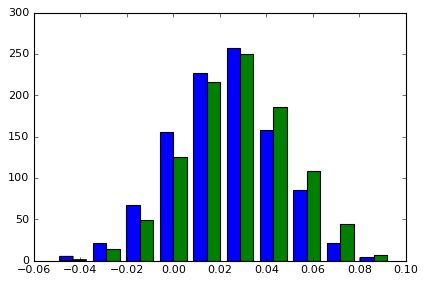

In [3]:
r0=[0.01,0.015]
mu=0.0025
T=5
vol=0.01
var=vol**2
rho=0.99
means=[r+mu*T for r in r0]

c=[[var*T,var*rho*T],[var*rho*T,var*T]]
n=1000
n2=np.random.multivariate_normal(means,c,n)
plt.hist(n2)

In [5]:
z=[np.exp(-x) for x in n2[:,0]]
zp=np.mean(z)
cc=np.cov(z,n2[:,1])[0][1]
print "Eurodollar convexity adjustment in bps",(cc/zp)*10000

Eurodollar convexity adjustment in bps -4.95841803114


              1M    3M    6M    1Y    2Y    3Y    5Y    7Y   10Y   20Y   30Y
Date                                                                        
2017-01-20  0.46  0.50  0.62  0.82  1.20  1.50  1.95  2.28  2.48  2.79  3.05
2017-01-23  0.46  0.51  0.59  0.79  1.16  1.43  1.88  2.19  2.41  2.72  2.99
2017-01-24  0.50  0.51  0.62  0.81  1.21  1.49  1.94  2.27  2.47  2.78  3.05
2017-01-25  0.48  0.50  0.61  0.82  1.23  1.52  1.99  2.33  2.53  2.84  3.10
2017-01-26  0.49  0.51  0.62  0.82  1.21  1.49  1.95  2.30  2.51  2.82  3.08


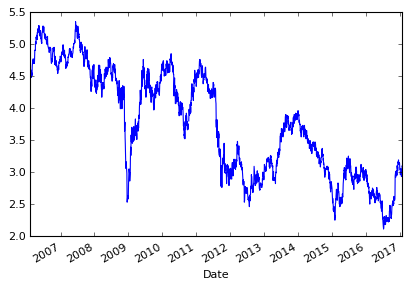

In [8]:
x1=pd.ExcelFile("CMT-all.xlsx")
df=x1.parse('Sheet1').set_index('Date')
d1='2006-02-09'
df=df[df.index>d1]
print df.tail()
df['30Y'].plot()

In [ ]:
def alpha(t,1):
    return ((1-np.exp(-1*t))/(1+t))

lam=0.0609
